# Lógica para Computação: Semântica da Lógica de Primeira-Ordem
> *Autor: Davi Romero de Vasconcelos, daviromero@ufc.br, Universidade Federal do Ceará, Campus de Quixadá, Março de 2022*.
> *(Última atualização 15/06/2022)*

Este material foi preparado para a disciplina de Lógica para Computação com a finalidade de apresentar os conceitos básicos de Lógica, utilizando a Linguagem de Programação Python para auxiliar no ensino-aprendizagem da disciplina. Para cada seção é apresentado um link (no título da seção) com um vídeo explicando o conteúdo a ser abordado. Uma Playlist com todo o conteúdo de Lógica para Computação está disponível no [YouTube](https://youtube.com/playlist?list=PLfOnKvd6pFiq_BUI-llPhDeGR55P6nHfr).

In [ ]:
#@title Implementação em Python dos conceitos sobre a Linguagem da Lógica de Primeira-Ordem
#@markdown > **Importante:** 
#@markdown - Os átomos e os predicados são escritos em letras maiúsculas (e.g. `A`, `B`,  `H(x)`).
#@markdown - As variáveis são escritas com a primeira letra em minúsculo, podendo ser seguida de letras e números (e.g. `x`, `x0`, `xP0`).
#@markdown - Os símbolos de $\bot,\models$ e os conectivos $\lnot,\land,\lor,\rightarrow$ são escritos por `@`,`|=`,`~`, `&`, `|`, `->` respectivamente.
#@markdown - As fórmulas com o $\forall x$ e $\exists x$ serão representadas por `Ax` e `Ex`  (`A` e `E` seguidos da variável `x`). Por exemplo, `Ax (H(x)->M(x))` representa $\forall x~(H(x)\rightarrow M(x))$.
#@markdown - A ordem de precedência dos quantificadores e dos conectivos lógicos é definida por $\lnot,\forall,\exists,\wedge,\vee,\rightarrow$ com alinhamento à direita. Por exemplo:
#@markdown   - A fórmula `~A&B->C` representa a fórmula $(((\lnot A)\land B)\rightarrow C)$.
#@markdown   - O teorema `~Ax P(x) |= Ex ~P(x)` representa o teorema $(\lnot ((\forall x)~P(x)))\models ((\exists x)~(\lnot P(x)))$.
#@markdown >
#@markdown > Não é necessário conhecer o código aqui implementado ou mesmo ter um conhecimento profundo da linguagem Python. Basta acompanhar os exemplos e experimentar construir suas próprias demonstrações.
#@markdown >*Execute esta célula (`ctrl+enter` ou clicando no botão ao lado) para que o ambiente seja carregado com as classes implementadas.*
#!pip install logic4py -q
!pip install git+https://github.com/daviromero/logic4py.git -q
from logic4py.example_reasoning import EXAMPLES
from logic4py.logic_gui import verify_reasoning_exercise
from logic4py.examples_gui import verify_truth_fo_graph_q1, verify_truth_formulas_q1, verify_countermodel_q1
from logic4py.logic_gui import display_countermodel_decoder, display_is_countermodel, display_countermodel


# [Semântica da Lógica de Primeira-Ordem](https://youtu.be/BRJDf_ApnWg)

Na lógica proposicional, damos significado as fórmulas através da atribuição de valores verdade para as fórmulas atômicas. Para darmos significado as fórmulas lógicas, precisamos interpretar:
- O universo de discurso.
- Os símbolos predicativos.
- Os símbolos constantes.
- Os símbolos funcionais.
- As variáveis.

Em outras palavras, devemos definir o que chamamos de uma estrutura. Formalmente, uma **interpretação** $\mathcal{I}$ (também chamada de **estrutura**) para uma linguagem lógica é uma função cujo domínio é a linguagem não-lógica $\Sigma=\langle C, (F_n)_{n\in\mathbb{N}},(P_n)_{n\in\mathbb{N}}\rangle$ e é tal que:
- $\mathcal{I}$ atribui um conjunto não vazio $|\mathcal{I}|$ chamado de **universo** (ou **domínio**) de $\mathcal{I}$.
- $\mathcal{I}$ atribui, para cada símbolo predicativo $p_n$ de aridade $n$, uma **relação** de aridade $n$ $p_n^{\mathcal{I}}\subseteq |\mathcal{I}|^n$, i.e., $p_n^{\mathcal{I}}$ é um conjunto de n-tuplas dos elementos do universo.
- $\mathcal{I}$ atribui, para cada símbolo constante $c$, um **elemento** (ou **indivíduo**) $c^{\mathcal{I}}$ do universo $|\mathcal{I}|$
- $\mathcal{I}$ atribui, para cada símbolo funcional $f_n$ de aridade $n$, uma **função** de aridade $n$ $f_n^{\mathcal{I}}:|\mathcal{I}|^n\rightarrow |\mathcal{I}|$

> **Exemplo:** Seja $\Sigma$ a linguagem não-lógica definida abaixo.
- $C=\{s,a,z\}$
- $F_n=\varnothing$ para todo $n$
- $P_1=\{H,M\}$ e para todo $n\not= 1$ $P_n=\varnothing$, onde $H$ e $M$ representarão as propriedades Homem e Mortal, respectivamente. 
>
> Uma estrutura $\mathcal{I}_1$ para essa linguagem não-lógica poderia ser:
- Universo de $|\mathcal{I}_1|=\{Socrates, Aristoteles, Zeus, Heitor\}$
- As constantes são interpretadas como $s^{\mathcal{I}_1}=Socrates$, $a^{\mathcal{I}_1}=Aristoteles$ e $z^{\mathcal{I}_1}=Zeus$
- Os símbolos predicativos são interpretados como $H^{\mathcal{I}_1}=\{\langle Socrates\rangle, \langle Aristoteles\rangle\}$ e $M^{\mathcal{I}_1}=\{\langle Socrates\rangle, \langle Aristoteles\rangle\}$.
>
> Em relação à estrutura acima, temos que
- $H(s)$ $\rightsquigarrow$ "Sócrates é um homem" é verdadeira, pois a constante $s$ é interpretada como $Socrates$ que pertence a relação da propriedade $H$. 
- $H(z)$ $\rightsquigarrow$ "Zeus é um homem" é falso, pois a constante $zs$ é interpretada como $Zeus$ que não pertence a relação da propriedade $H$. 
- $\exists x M(x)$ $\rightsquigarrow$ "alguém é mortal" é verdadeira, pois existem dois indivíduos $Socrates$ e $Aristoteles$ que pertencem a relação da propriedade $M$. 
- $\forall x H(x)$ $\rightsquigarrow$ "todos são homens" é falsa, pois existem dois indivíduos $Zeus$ e $Heitor$ que não pertencem a relação da propriedade $H$.
- $\forall x M(x)$ $\rightsquigarrow$ "todos são mortais" é falsa, pois existem dois indivíduos $Zeus$ e $Heitor$ que não pertencem a relação da propriedade $M$.
- $\forall x (H(x)\rightarrow M(x))$ $\rightsquigarrow$ "todos homens são mortais" é verdadeira, pois existem os dois indivíduos $Socrates$ e $Aristoteles$ que estão em ambas as propriedades $H$ e $M$, e nos demais indivíduos, $Zeus$ e $Heitor$, não pertencem a relação da propriedade $H$.
- $\exists x \lnot (x\approx s\vee x\approx a\vee x\approx z)$ $\rightsquigarrow$ "existe alguém que não é Sócrates, Aristóteles e Zeus" é verdadeira, pois existe um indivíduo $Heitor$ que não é nenhum dos indivíduos que são interpretados por $s, a$ e $z$.



In [ ]:
#@title Semântica - Exemplo Mitologia
#@markdown Execute essa célula para gerar o seu exercício.
verify_truth_formulas_q1()

> **Exemplo Grafos:** Seja $\Sigma_{G}$ a linguagem não-lógica definida abaixo.
- $C=\varnothing$
- $F_n=\varnothing$ para todo $n$
- $P_2=\{E\}$ e para todo $n\not= 2$ $P_n=\varnothing$
>
> Uma estrutura $\mathcal{I}_G$ para essa linguagem não-lógica poderia ser:
- Universo de $|\mathcal{I}_G|=\{a,b,c,d\}$ (conjunto de nós)
- O símbolo predicativo é interpretado como $E^{\mathcal{I}_G}=\{\langle a,b\rangle, \langle b,a\rangle\, \langle b,c\rangle, \langle c,c\rangle\}$ (os arcos)
>
>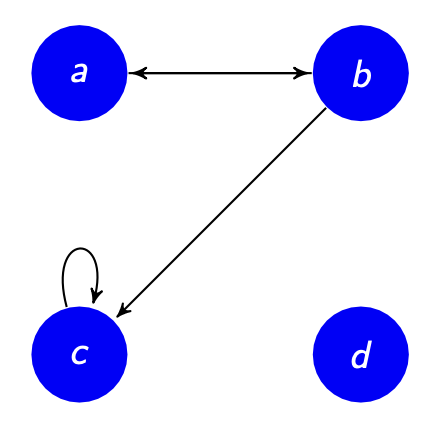
>
> Em relação à estrutura acima, temos:
- $\exists x E(x,x)$ $\rightsquigarrow$ "existe um nó que está relacionado consigo" é verdadeiro, pois o elemento $c$ está relacionado com o próprio $c$ em na relação $E$.
- $\forall x E(x,x)$ $\rightsquigarrow$ "o grafo é reflexivo" é falso, pois, por exemplo, o elemento $a$ não está relacionado com o próprio $a$ em $E$. 
- $\forall x\exists y E(x,y)$ $\rightsquigarrow$ "todo nó tem um arco saindo dele para outro nó" é uma sentença falsa neste exemplo, pois o elemento $d$ não tem nenhum arco saindo dele (relação $E$ com o $d$ como primeiro componente).
- $\forall x\forall y (E(x,y)\leftrightarrow E(y,x))$ $\rightsquigarrow$ "o grafo é não direcionado" é uma sentença falsa, pois, por exemplo, o nó $b$ está relacionado com $c$, mas não o contrário.
- $\exists x\forall y\lnot E(y,x)$ $\rightsquigarrow$ "existe um vértice que é uma fonte" é uma sentença verdadeira, pois o $d$ é uma fonte.
- $\exists x\forall y\lnot E(x,y)$ $\rightsquigarrow$ "existe um vértice que é uma sumidouro" é uma sentença verdadeira, pois o $d$ é uma sumidouro.


In [ ]:
#@title Semântica - Exemplo Grafo
#@markdown Execute essa célula para gerar o seu exercício.
verify_truth_fo_graph_q1()

> **Exemplo Naturais**: Seja $\Sigma_{\mathbb{N}}$ a linguagem não-lógica definida abaixo.
- $C=\{c\}$
- $F_1=\{f\}$ e para todo $n\not= 1$ $F_n=\varnothing$
- $P_2=\{p\}$ e para todo $n\not= 2$ $P_n=\varnothing$
>
> Uma estrutura $\mathcal{I}_\mathbb{N}$ para essa linguagem não-lógica poderia ser:
- Universo de $|\mathcal{I}_\mathbb{N}|=\mathbb{N}$ (o conjunto dos números naturais)
- O símbolo $c$ é interpretado como o valor $0$, i.e., $c^{\mathcal{I}_\mathbb{N}}=0$.
- O símbolo funcional $f$ é interpretado como a função sucessor, i.e., $f^{\mathcal{I}_\mathbb{N}}(n)=n+1$
- O símbolo predicativo $p$ é interpretado pelos pares $\langle a,b\rangle$ tal que $a\leq b$
>
> Em relação à estrutura acima, temos:
- $f(c)\approx c$ $\rightsquigarrow$ "o sucessor de zero é igual a zero" é uma sentença falsa.
- $P(c,f(c))$ $\rightsquigarrow$ "zero é menor ou igual a um (sucessor de zero)" é uma senteça verdadeira.
- $\exists x (x\approx c)$ $\rightsquigarrow$ "existe um número que é igual a zero" é uma sentença verdadeira.
- $\forall x P(c,x)$ $\rightsquigarrow$ "zero é meior ou igual a qualquer número" é uma sentença verdadeira.
- $\forall x P(x,x)$ $\rightsquigarrow$ "todo número é menor ou igual a si mesmo" é uma sentença verdadeira.
- $\forall x (\lnot P(f(x),x))$ $\rightsquigarrow$ "todo número não é menor ou igual ao seu sucessor" e uma senteça verdadeira.
- $\forall x\exists y (f(x)\approx y)$ $\rightsquigarrow$ "todo número tem um sucessor" é uma sentença verdadeira.
- $\forall x\exists y (x\approx f(y))$ $\rightsquigarrow$ "todo número é sucessor de algum número" é uma sentença falsa, pois o número $0$ não é sucessor de ninguem nos números naturais.

## [Satisfatibilidade da Lógica de Primeira-Ordem](https://youtu.be/CmeRhxIU3fQ)
Podemos ter variáveis livres ocorrendo em uma fórmula. Assim, precisamos interpretá-las, i.e.,
$s:\mathcal{V}\rightarrow|\mathcal{I}|$ uma função do conjunto $\mathcal{V}$ das variáveis no conjunto universo $|\mathcal{I}|$ de $\mathcal{I}$

Definimos $s(x|d)$ exatamente como a função $s$ exceto por uma coisa: no lugar da variável
$x$ assume-se o valor $d$. Isto pode ser expresso na
seguinte equação:
$$s(x|d)(y)=\left\{
\begin{align*} s(y), \textrm{ se }\ y\neq x
        \\ d, \textrm{ caso contrário }
\end{align*}
\right. $$

> **Exemplo Estrututa dos Naturais:** Seja $s:\mathcal{V}\rightarrow \mathbb{N}$ a função $s(v_i)=i$, i.e., $s(v_0)=0, s(v_1)= 1, \ldots$
- $s(v_2|1)(v_0)=0$
- $s(v_2|1)(v_2)=1$


Como trabalhamos com termos, definimos uma função $\bar{s}: T(\Sigma)\rightarrow |\mathcal{I}|$ dos termos no conjunto universo $|\mathcal{I}|$. A função $\bar{s}$ é definida recursivamente como:
- Para cada variável $x\in\mathcal{V}$, $\bar{s}(x)=s(x)$.
- Para cada símbolo constante $c\in C$, $\bar{s}(c)=c^{\mathcal{I}}$.
- Se $t_1,\ldots,t_n\in T(\Sigma)$ são termos e $f_n\in F_n$, então $\bar{s}(f(t_1,\ldots,t_n))=f^{\mathcal{I}}(\bar{s}(t_1),\ldots,\bar{s}(t_n))$

> **Exemplo Estrututa dos Naturais:** 
- $\bar{s}(c)=c^{\mathcal{I}_\mathbb{N}}=0$
- $\bar{s}(f(c))=f^{\mathcal{I}_\mathbb{N}}(\bar{s}(c))=\bar{s}(c)+1= 0+1= 1$

Escrevemos $\models_{\mathcal{I}}\varphi[s]$ para indicar que a estrutura $\mathcal{I}$ **satisfaz** a fórmula $\varphi$ com $s$. A definição de $\models$ é como segue:
- $\models_{\mathcal{I}}p(t_1,\ldots,t_n)[s]$ $\Longleftrightarrow$ $\langle \bar{s}(t_1),\ldots, \bar{s}(t_n)\rangle\in p^{\mathcal{I}}$
- $\models_{\mathcal{I}}t_1\approx t_2[s]$ 
$\Longleftrightarrow$ $\bar{s}(t_1)=\bar{s}(t_2)$
- $\models_{\mathcal{I}}(\lnot \varphi)[s]$ $\Longleftrightarrow$ NÃO $\models_{\mathcal{I}}\varphi[s]$
- $\models_{\mathcal{I}}(\varphi\wedge\psi)[s]$ $\Longleftrightarrow$ $\models_{\mathcal{I}}\varphi[s]$ E $\models_{\mathcal{I}}\psi[s]$
- $\models_{\mathcal{I}}(\varphi\vee\psi)[s]$ $\Longleftrightarrow$ $\models_{\mathcal{I}}\varphi[s]$ OU $\models_{\mathcal{I}}\psi[s]$
- $\models_{\mathcal{I}}(\varphi\rightarrow\psi)[s]$ $\Longleftrightarrow$ SE $\models_{\mathcal{I}}\varphi[s]$ ENTÃO $\models_{\mathcal{I}}\psi[s]$
- $\models_{\mathcal{I}}\exists x\varphi[s]$ $\Longleftrightarrow$ Existe um $d\in|\mathcal{I}|$ tal que $\models_{\mathcal{I}}\varphi[s(x|d)]$
- $\models_{\mathcal{I}}\forall x\varphi[s]$ $\Longleftrightarrow$ Para todo $d\in|\mathcal{I}|$ temos que $\models_{\mathcal{I}}\varphi[s(x|d)]$

Escrevemos $\not\models_{\mathcal{I}}\varphi[s]$ para indicar que a estrutura $\mathcal{I}$ \textbf{não} satisfaz a fórmula $\varphi$ com $s$.

> **Exemplo Estrutura Naturais:** Dada a interpretação (estrutura) $\mathcal{I}_\mathbb{N}$ e a função $s(v_i)=i$, temos que
- $\models_{\mathcal{I}_\mathbb{N}}v_0\approx c[s]$ $\Longleftrightarrow$ $\bar{s}(v_0)=\bar{s}(c)$ $\Longleftrightarrow$ $0=0$ 
- $\not\models_{\mathcal{I}_\mathbb{N}}f(c)\approx c[s]$ $\Longleftrightarrow$ $\bar{s}(f(c))\neq\bar{s}(c)$ $\Longleftrightarrow$  $1\neq0$
- $\models_{\mathcal{I}_\mathbb{N}}p(c,v_1)[s]$ $\Longleftrightarrow$  $\langle\bar{s}(c),\bar{s}(v_1)\rangle\in p^{\mathcal{I}_\mathbb{N}}$ i.e. $0\leq 1$
- $\models_{\mathcal{I}_\mathbb{N}}\forall v_1 (p(c,v_1))[s] $
  \begin{align*}
  & \Longleftrightarrow & \text{para todo }n\in\mathbb{N}\text{ temos que }  \models_{\mathcal{I}_\mathbb{N}}p(c,v_1)[s(v_1|n)] \\
  & \Longleftrightarrow & \text{para todo }n\in\mathbb{N}\text{ temos que }  \langle\bar{s}(v_1|n)(c),\bar{s}(v_1|n)(v_1)\rangle\in p^{\mathcal{I}_\mathbb{N}}\\
  & \Longleftrightarrow & \text{para todo }n\in\mathbb{N}\text{ temos que }  \langle 0,n\rangle\in p^{\mathcal{I}_\mathbb{N}}\text{ i.e. }0\leq n
  \end{align*}

- Uma fórmula $\varphi$ é dita **satisfatível** se existem uma estrutura $\mathcal{I}$ e uma função $s$ tal que $\models_{\mathcal{I}}\varphi[s]$.
- Uma fórmula $\varphi$ é dita **insatisfatível** se toda estrutura $\mathcal{I}$ e toda função $s$ são tais que $\not\models_{\mathcal{I}}\varphi[s]$.
- Uma fórmula $\varphi$ é dita **válida** (ou uma **tautologia**) se toda estrutura $\mathcal{I}$ e toda função $s$ são tais que $\models_{\mathcal{I}}\varphi[s]$. Neste caso escrevemos $\models\varphi$.
- Uma fórmula $\varphi$ é dita **falsificável** se existem uma estrutura $\mathcal{I}$ e uma função $s$ tal que $\not\models_{\mathcal{I}}\varphi[s]$.


> **Exemplo:** Demonstre que $\models\lnot \forall x \varphi\rightarrow \exists x \lnot \varphi$ (**válida**)
>
> **Demonstração:** Suponha $\mathcal{I}$ uma estrutura qualquer e $s$ uma função qualquer. Devemos demonstrar que SE $\models_\mathcal{I}\lnot \forall x \varphi[s]$ ENTÃO $\models_\mathcal{I}\exists x \lnot \varphi[s]$.
\begin{align*}
  \models_\mathcal{I}\lnot \forall x \varphi[s]   &   &
\\   & \Longrightarrow & \not\models_\mathcal{I}\forall x \varphi[s]
\\   & \Longrightarrow & \text{Não é o caso de que } \forall d\in |\mathcal{I}| \text{ tal que } \models_\mathcal{I}\varphi[s(x|d)]
\\   & \Longrightarrow & \text{} \exists d\in |\mathcal{I}| \text{ tal que } \not\models_\mathcal{I}\varphi[s(x|d)]
\\   & \Longrightarrow & \text{} \exists d\in |\mathcal{I}| \text{ tal que } \models_\mathcal{I}\lnot\varphi[s(x|d)]
\\   & \Longrightarrow & \models_\mathcal{I}\exists x\lnot\varphi[s]
\end{align*}


> **Exemplo:** $\forall x (P(x)\vee I(x))\rightarrow \forall x P(x)\vee\forall x I(x)$ **é falsificável**
>
> **Demonstração:** Devemos mostrar uma estrutura $\mathcal{I}$ e $s$ uma função tais que $\not\models_\mathcal{I}\forall x (P(x)\vee I(x))\rightarrow \forall x P(x)\vee\forall x I(x)[s]$ 
>
> Seja $\mathcal{I}_\mathbb{N}$ uma estrutura tal que
- $|\mathcal{I}_\mathbb{N}|=\mathbb{N}$
- $P^{\mathcal{I}_\mathbb{N}}$ é interpretado como a relação Par
- $I^{\mathcal{I}_\mathbb{N}}$ é interpretado como a relação Ímpar
>
> Basta demonstrar que para qualquer $s$, temos que $\not\models_{\mathcal{I}_\mathbb{N}}\forall x (P(x)\vee I(x))\rightarrow \forall x P(x)\vee\forall x I(x)[s]$


> **Teorema:** Sejam $s_1$ e $s_2$ funções de $\mathcal{V}$ em $|\mathcal{I}|$ tais que ambas atribuem o mesmo valor para cada variável livre ocorrendo em $\varphi$. Formalmente, $\forall x(x\in VL(\varphi)\rightarrow s_1(x)=s_2(x))$.
$$\models_{\mathcal{I}}\varphi[s_1] \Longleftrightarrow \models_{\mathcal{I}}\varphi[s_2]$$
>
> **Corolário:** Para uma sentença $\varphi$, temos que ou
- $\mathcal{I}$ satisfaz a fórmula $\varphi$ com todas as funções $s$. Dizemos que a estrutura $\mathcal{I}$ é um modelo de $\varphi$ (escrito como $\models_{\mathcal{I}}\varphi$); ou
- $\mathcal{I}$ não satisfaz a fórmula $\varphi$ com nenhuma função $s$.



## Conseqüência Lógica
Sejam $\Gamma$ um conjunto de fórmulas e $\varphi$ uma fórmula. Escrevemos $\Gamma\models\varphi$ para indicar que a fórmula $\varphi$ é **conseqüência lógica** de $\Gamma$, i.e., se para toda estrutura $\mathcal{I}$ e toda função $s$
$$\left(\models_{\mathcal{I}}\psi[s] \textrm{ para todo }\psi\in\Gamma\right) \Longrightarrow \models_{\mathcal{I}}\varphi[s] .$$

Escrevemos $\Gamma\not\models\varphi$ se $\Gamma\models\varphi$ não é o caso.
Usualmente, escrevemos $\varphi_1,\ldots\varphi_n\models\psi$ para representar $\{\varphi_1,\ldots\varphi_n\}\models\psi$. 

Dizemos que $\varphi$ e $\psi$ são **logicamente equivalentes** sse $\varphi\models\psi$ e $\psi\models\varphi$

> **Exemplos:** 
> - $\forall x\varphi\models\lnot \exists x\lnot\varphi$ 
> - $\exists x\varphi\models\lnot \forall x\lnot \varphi$ 
> - $\forall x(\varphi\rightarrow\psi)\models(\forall x \varphi\rightarrow\forall x\psi)$

## Contraexemplo

Para demonstrar que $\Gamma\not\models\varphi$, devemos apresentar um **contraexemplo**, ou seja, uma estrutura $\mathcal{I}$ e função $s$ tal que 
- $\models_{\mathcal{I}}\psi[s] \textrm{ para todo }\psi\in\Gamma$
- $\not\models_{\mathcal{I}}\varphi[s]$

> **Exemplos:** 
> - $F(x)\not\models \forall x F(x)$ 
> - $\forall x\varphi\not\models \exists x\lnot\varphi$ 
> - $\exists x\varphi\not\models\exists x\lnot \varphi$ 
> - $(\forall x \varphi\rightarrow\forall x\psi)\not\models\forall x(\varphi\rightarrow\psi)$
> - $\forall x (P(x)\vee I(x))\not\models \forall x P(x)\vee\forall x I(x)$


### Testando um Contraexemplo 
Podemos testar se um teorema tem um contraexemplo, bastando para tanto definir:
- O conjunto universo (e.g. `universe = {'a','b'}`
- A interpretação dos predicatos `preds` (tipo dicionário em Python, i.e., `preds={}`). Cada predicado deverá ter as tuplas que pertencem a interpretação do predicato. Por exemplo, considere o predicado unário `P` interpretado apenas por `(b)`. Assim teremos o código `preds['P',1]={('b')}`.
- Interpretar as variáveis do teorema `s` (tipo dicionário em Python, `s={}`). Por exemplo, a variável `x` pode ser interpretada por `a`. Assim, teremos o código `s[x]='a'`.

Por fim, basta chamar a função `display_is_countermodel` passando como argumento o teorema (string) e a interpretação definida.


In [ ]:
universe = {'a', 'b'}
s = {}
s['x'] = 'a'
preds = {}
preds['F',1] = {('a')}
input_theorem = 'F(x) |= Ax F(x)'
display_is_countermodel(input_theorem,universe,s,preds)


Também é possível escrever a intepretação por meio de texto a partir do método `display_countermode_decoder`, no qual:
- O conjunto universo deve ser definido pela variável `U`. Por exemplo, `U = {a,b}`.
- Cada predicado deve ser interpretado por suas tuplas. Por exemplo, `F = {(a),(b)}`. Observação, em caso de dois predicados de mesmo nome e com aridades diferentes, você deverá explicitar a aridade de cada um em sua definição por meio do predicado, do símbolo `_` seguido de sua aridade. Por exemplo, se temos o predicado `F` com aridades `1` e `2`, devemos definir `F_1 = {(a),(b)}` e `F_2 = {(a,a), (b,b)}`.
- A variáveis devem ser definidas. Por exemplo, `x = a` significa que a variável `x` é interpretada por `a`.

In [ ]:
#@title Exemplo Contraexempo: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.

input_interpretation='''
#Defina o conjunto universo:
U = {a,b}
#Defina os predicados:
F = {(a)}
#Defina as variáveis:
x = a
'''
input_theorem = 'F(x) |= Ax F(x)'
display_countermodel_decoder(input_theorem,input_interpretation)

Alternativamente, podemos usar uma interface para definir o contraexemplo. Basta chamar a função `display_countermodel` passando como argumento o teorema (string)

In [ ]:
display_countermodel( 'F(x) |= Ax F(x)')

## Exemplos

In [ ]:
#@title Exemplo 1: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q1_fo_ex')

**Exemplo 1: Represente e demonstre, utilizando a definição recursiva de $\models$, se o raciocínio da questão acima na Linguagem Lógica é válido.**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. $P$ um predicado de aridade 1 para "gosta de voo de parapente".
> 1. $R$ um predicado de aridade 1 para "gosta de esporte radical".
> 1. $m$ uma variável para "Maria".
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. $\forall x(P(x)\rightarrow R(x))$ para "Quem gosta de voo de parapente gosta de esporte radical".
> 1. $P(m)$ para "Maria gosta de voo de parapente". 
> 1. $R(m)$ para "Maria gosta de esporte radical".
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$\forall x(P(x)\rightarrow R(x)), P(m)\vdash R(m)$$
>
> **Demonstração:**
> Seja $\mathcal{I}$ uma estrutura qualquer e $s$ uma função de variáveis em elementos do domínio qualquer.
> Devemos demonstrar que 
> $$\textrm{Se }\left(\begin{align*}\models_{\mathcal{I}}\forall x(P(x)\rightarrow R(x))[s] \\ \textrm{ E } \models_{\mathcal{I}}P(m)[s] \end{align*}\right)\textrm{ então }\models_{\mathcal{I}}R(m)[s]$$
> Assuma que:
> 1. $$\begin{align*}\models_{\mathcal{I}}\forall x(P(x)\rightarrow R(x))[s] & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\models_{\mathcal{I}}P(x)\rightarrow R(x)[s(x|d)] \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\not\models_{\mathcal{I}}P(x)[s(x|d)]\textrm{ OU } \models_{\mathcal{I}}R(x)[s(x|d)] \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\langle s(x|d)(x)\rangle\not\in P^{\mathcal{I}}\textrm{ OU } \langle s(x|d)(x)\rangle\in R^{\mathcal{I}} \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\langle d\rangle\not\in P^{\mathcal{I}}\textrm{ OU } \langle d\rangle\in R^{\mathcal{I}}\end{align*}$$
> 1. $\models_{\mathcal{I}}P(m)[s]\Longleftrightarrow \langle s(m)\rangle\in P^{\mathcal{I}}$
>
> Como $s(m)\in|\mathcal{I}|$ e considerando as Equações $1$ e $2$, temos que
> $$\begin{align*}\langle s(m)\rangle\in R^{\mathcal{I}} & \Longrightarrow \models_{\mathcal{I}}R(m)[s] \end{align*}$$

In [ ]:
#@title Exemplo 2: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q2_fo_ex')

**Exemplo 2: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. $P$ um predicado de aridade 1 para "gosta de voo de parapente".
> 1. $R$ um predicado de aridade 1 para "gosta de esporte radical".
> 1. $m$ uma variável para "Maria".
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. $\forall x(P(x)\rightarrow R(x))$ para "Quem gosta de voo de parapente gosta de esporte radical".
> 1. $\lnot R(m)$ para "Maria não gosta de esporte radical".
> 1. $P(m)$ para "Maria gosta de voo de parapente". 
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$\forall x(P(x)\rightarrow R(x)), \lnot R(m)\vdash P(m)$$
> 
> **Demonstração:** O racioncínio não é válido. Considere a seguinte interpretação $\mathcal{I}$ e função $s$:
> - $|\mathcal{I}|=\{a,b\}$
> - $P^{\mathcal{I}}=\{\langle b\rangle \}$ e $R^{\mathcal{I}}=\{\langle b\rangle\}$  
> - $s(m)=a$
>
> Daí devemos demonstrar que 
> 1. $$\begin{align*}\models_{\mathcal{I}}\forall x(P(x)\rightarrow R(x))[s] & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\models_{\mathcal{I}}P(x)\rightarrow R(x)[s(x|d)] \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\not\models_{\mathcal{I}}P(x)[s(x|d)]\textrm{ OU } \models_{\mathcal{I}}R(x)[s(x|d)] \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\langle s(x|d)(x)\rangle\not\in P^{\mathcal{I}}\textrm{ OU } \langle s(x|d)(x)\rangle\in R^{\mathcal{I}} \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\langle d\rangle\not\in P^{\mathcal{I}}\textrm{ OU } \langle d\rangle\in R^{\mathcal{I}} \\ & \Longleftrightarrow \textrm{Para todo }d\in\{a,b\}\textrm{ temos que }\langle d\rangle\not\in \{\langle b\rangle\}\textrm{ OU } \langle d\rangle\in\{\langle b\rangle\}\\ & \Longleftarrow \langle a\rangle\not\in \{\langle b\rangle\}\textrm{ E } \langle b\rangle\in\{\langle b\rangle\}\end{align*}$$
> 1. $$\begin{align*}\models_{\mathcal{I}}\lnot R(m)[s] & \Longleftrightarrow \not\models_{\mathcal{I}}R(m)[s] \\ & \Longleftrightarrow \langle s(m)\rangle\not\in R^{\mathcal{I}} \\ & \Longleftrightarrow \langle a\rangle\not\in \{\langle b\rangle\}\end{align*}$$
> 1. $$\begin{align*}\not\models_{\mathcal{I}}P(m)[s] & \Longleftrightarrow \langle s(m)\rangle\not\in P^{\mathcal{I}} \\ & \Longleftrightarrow \langle a\rangle\not\in \{\langle b\rangle\}\end{align*}$$


In [ ]:
universe = {'a', 'b'}
s = {}
s['m'] = 'a'
preds = {}
preds['R',1] = {('b')}
preds['P',1] = {('b')}
input_theorem = 'Ax (P(x) -> R(x)), ~R(m) |= P(m)'
display_is_countermodel(input_theorem,universe,s,preds)


In [ ]:
#@title Exemplo 3: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q3_fo_ex')

**Exemplo 3: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. $P$ um predicado de aridade 1 para "gosta de voo de parapente".
> 1. $C$ um predicado de aridade 1 para "gosta de chuva".
> 1. $j$ uma variável para "João".
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. $\forall x(P(x)\rightarrow \lnot C(x))$ para "Quem gosta de voo de parapente não gosta de chuva".
> 1. $C(j)$ para "João gosta chuva". 
> 1. $\lnot P(j)$ para "João não gosta de voo de parapente".
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$\forall x(P(x)\rightarrow \lnot C(x)), C(j)\vdash \lnot P(j)$$
>
> **Demonstração:**
> Seja $\mathcal{I}$ uma estrutura qualquer e $s$ uma função de variáveis em elementos do domínio qualquer.
> Devemos demonstrar que 
> $$\textrm{Se }\left(\begin{align*}\models_{\mathcal{I}}\forall x(P(x)\rightarrow \lnot C(x))[s] \\ \textrm{ E } \models_{\mathcal{I}}C(j)[s] \end{align*}\right)\textrm{ então }\models_{\mathcal{I}}\lnot P(j)[s]$$
> Assuma que:
> 1. $$\begin{align*}\models_{\mathcal{I}}\forall x(P(x)\rightarrow \lnot C(x))[s] & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\models_{\mathcal{I}}P(x)\rightarrow \lnot C(x)[s(x|d)] \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\not\models_{\mathcal{I}}P(x)[s(x|d)]\textrm{ OU } \models_{\mathcal{I}}\lnot C(x)[s(x|d)] \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\not\models_{\mathcal{I}}P(x)[s(x|d)]\textrm{ OU } \not\models_{\mathcal{I}} C(x)[s(x|d)] \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\langle s(x|d)(x)\rangle\not\in P^{\mathcal{I}}\textrm{ OU } \langle s(x|d)(x)\rangle\not\in C^{\mathcal{I}} \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\langle d\rangle\not\in P^{\mathcal{I}}\textrm{ OU } \langle d\rangle\not\in C^{\mathcal{I}}\end{align*}$$
> 1. $\models_{\mathcal{I}}C(j)[s]\Longleftrightarrow \langle s(j)\rangle\in C^{\mathcal{I}}$
>
> Como $s(j)\in|\mathcal{I}|$ e considerando as Equações $1$ e $2$, temos que
> $$\begin{align*}\langle s(j)\rangle\not\in P^{\mathcal{I}} & \Longrightarrow \not\models_{\mathcal{I}}P(j)[s]& \Longrightarrow \models_{\mathcal{I}}\lnot P(j)[s] \end{align*}$$

In [ ]:
#@title Exemplo 4: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q4_fo_ex')

**Exemplo 4: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. $P$ um predicado de aridade 1 para "gosta de voo de parapente".
> 1. $C$ um predicado de aridade 1 para "gosta de chuva".
> 1. $j$ uma variável para "João".
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. $\forall x(P(x)\rightarrow \lnot C(x))$ para "Quem gosta de voo de parapente não gosta de chuva".
> 1. $\lnot C(j)$ para "João não gosta chuva". 
> 1. $P(j)$ para "João gosta de voo de parapente".
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$\forall x(P(x)\rightarrow \lnot C(x)), \lnot C(j)\vdash P(j)$$
> **Demonstração:** O racioncínio não é válido. Considere a seguinte interpretação $\mathcal{I}$ e função $s$:
> - $|\mathcal{I}|=\{a,b\}$
> - $P^{\mathcal{I}}=\{\langle b\rangle \}$ e $C^{\mathcal{I}}=\emptyset$  
> - $s(j)=a$
>
> Daí devemos demonstrar que 
> 1.  $$\begin{align*}\models_{\mathcal{I}}\forall x(P(x)\rightarrow \lnot C(x))[s] & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\models_{\mathcal{I}}P(x)\rightarrow \lnot C(x)[s(x|d)] \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\not\models_{\mathcal{I}}P(x)[s(x|d)]\textrm{ OU } \models_{\mathcal{I}}\lnot C(x)[s(x|d)] \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\not\models_{\mathcal{I}}P(x)[s(x|d)]\textrm{ OU } \not\models_{\mathcal{I}} C(x)[s(x|d)] \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\langle s(x|d)(x)\rangle\not\in P^{\mathcal{I}}\textrm{ OU } \langle s(x|d)(x)\rangle\not\in C^{\mathcal{I}} \\ & \Longleftrightarrow \textrm{Para todo }d\in|\mathcal{I}|\textrm{ temos que }\langle d\rangle\not\in P^{\mathcal{I}}\textrm{ OU } \langle d\rangle\not\in C^{\mathcal{I}}\\ & \Longleftarrow \textrm{ temos que }\langle a\rangle\not\in C^{\mathcal{I}}\textrm{ E } \langle b\rangle\not\in C^{\mathcal{I}}\end{align*}$$
> 1. $$\begin{align*}\models_{\mathcal{I}}\lnot C(j)[s] & \Longleftrightarrow \not\models_{\mathcal{I}}C(j)[s] \\ & \Longleftrightarrow \langle s(j)\rangle\not\in C^{\mathcal{I}} \\ & \Longleftrightarrow \langle a\rangle\not\in \emptyset\end{align*}$$
> 1. $$\begin{align*}\not\models_{\mathcal{I}}P(j)[s] & \Longleftrightarrow \langle s(j)\rangle\not\in P^{\mathcal{I}} \\ & \Longleftrightarrow \langle a\rangle\not\in \{\langle b\rangle\}\end{align*}$$


In [ ]:
# Contraexemplo do Exemplo 4
universe = {'a', 'b'}
preds = {}
preds['P',1] = {('b')}
preds['C',1] = set()
s = {}
s['j'] = 'a' 
input_theorem = 'Ax (P(x) -> ~C(x)), ~C(j) |= P(j)'
display_is_countermodel(input_theorem,universe,s,preds)

Alternativamente, podemos usar uma interface para definir o contraexemplo. Basta chamar a função `display_countermodel` passando como argumento o teorema (string)

In [ ]:
#@title Exemplo 4: Contraexemplo em Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
display_countermodel( 'Ax (P(x) -> ~C(x)), ~C(j) |= P(j)')

In [ ]:
#@title Exemplo 5: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q5_fo_ex')

**Exemplo 5: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. $A$ um predicado de aridade 2 para "amado".
> 1. $F$ um predicado de aridade 1 para "feliz".
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. $\forall x \exists y(A(x,y)\rightarrow F(x))$ para "Todo mundo que é amado por alguém é feliz".
> 1. $\exists x \lnot F(x)$ para "Existe alguém que não é feliz". 
> 1. $\exists x\lnot \forall y A(x,y)$ para "Existe alguém que não é amado por ninguém".
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$\forall x \exists y(A(x,y)\rightarrow F(x)), \exists x \lnot F(x)\vdash \exists x\lnot \forall y A(x,y)$$
>
> **Demonstração:**
> Seja $\mathcal{I}$ uma estrutura qualquer e $s$ uma função de variáveis em elementos do domínio qualquer.
> Devemos demonstrar que 
> $$\textrm{Se }\left(\begin{align*}\models_{\mathcal{I}}\forall x \exists y(A(x,y)\rightarrow F(x))[s] \\ \textrm{ E } \models_{\mathcal{I}}\exists x \lnot F(x)[s] \end{align*}\right)\textrm{ então }\models_{\mathcal{I}}\exists x\lnot \forall y A(x,y)[s]$$
> Assuma que:
> 1. $$\begin{align*}  & \models_{\mathcal{I}}\forall x \exists y(A(x,y)\rightarrow F(x))[s] \\  \Longleftrightarrow &\textrm{Para todo }d\in |\mathcal{I}|,\textrm{ temos que }\models_{\mathcal{I}}\exists y(A(x,y)\rightarrow F(x))[s(x|d)]  \\  \Longleftrightarrow &\textrm{Para todo }d\in |\mathcal{I}|, \textrm{ temos que existe um }e\in |\mathcal{I}|\textrm{ tal que }\models_{\mathcal{I}}A(x,y)\rightarrow F(x)[s(x|d)(y|e)] \\  \Longleftrightarrow &\textrm{Para todo }d\in |\mathcal{I}|, \textrm{ temos que existe um }e\in |\mathcal{I}|\textrm{ tal que }\not\models_{\mathcal{I}}A(x,y)[s(x|d)(y|e)]\textrm{ OU } \models_{\mathcal{I}}F(x)[s(x|d)(y|e)]\\  \Longleftrightarrow &\textrm{Para todo }d\in |\mathcal{I}|, \textrm{ temos que existe um }e\in |\mathcal{I}|\textrm{ tal que }\langle s(x|d)(y|e)(x),s(x|d)(y|e)(y)\rangle\not\in A^{\mathcal{I}}\textrm{ OU } \langle s(x|d)(y|e)(x)\rangle\in F^\mathcal{I} \\  \Longleftrightarrow &\textrm{Para todo }d\in |\mathcal{I}|, \textrm{ temos que existe um }e\in |\mathcal{I}|\textrm{ tal que }\langle d,e\rangle\not\in A^{\mathcal{I}}\textrm{ OU } \langle d\rangle\in F^\mathcal{I}\end{align*}$$
> 1. $$\begin{align*}  & \models_{\mathcal{I}}\exists x \lnot F(x)[s] \\ \Longleftrightarrow & \textrm{Existe um }d\in |\mathcal{I}|\textrm{ tal que }\models_{\mathcal{I}}\lnot F(x)[s(x|d)] \\ \Longleftrightarrow & \textrm{Existe um }d\in |\mathcal{I}|\textrm{ tal que }\not\models_{\mathcal{I}} F(x)[s(x|d)] \\ \Longleftrightarrow & \textrm{Existe um }d\in |\mathcal{I}|\textrm{ tal que } \langle s(x|d)(x)\rangle \not\in F^{{\mathcal{I}}} \\ \Longleftrightarrow & \textrm{Existe um }d\in |\mathcal{I}|\textrm{ tal que } \langle d\rangle\not\in F^{{\mathcal{I}}}\end{align*}$$
>
> Pela Equação 2, sabemos que existe um elemento do domínio, suponha $d$, que não tem a propriedade $F$. Por outro lado, pela Equação 1, a propriedade vale para todos os elementos. Assim, ela também vale $d$ e temos que existe um elemento, suponha $e$, $\textrm{ tal que }\langle d,e\rangle\not\in A^{\mathcal{I}}\textrm{ OU } \langle d\rangle\in F^\mathcal{I}$ e como sabemos que $\langle d\rangle\not\in F^{\mathcal{I}}$, podemos concluir que
>
> 3. $\langle d,e\rangle\not\in A^{\mathcal{I}}$
>
>  Devemos demonstrar que 
> 1. $$\begin{align*}  & \models_{\mathcal{I}}\exists x\lnot \forall y A(x,y)[s] \\ \Longleftrightarrow & \textrm{Existe um }d\in|\mathcal{I}|\textrm{ tal que } \models_{\mathcal{I}}\lnot \forall y A(x,y)[s(x|d)] \\ \Longleftrightarrow & \textrm{Existe um }d\in|\mathcal{I}|\textrm{ tal que } \not\models_{\mathcal{I}}\forall y A(x,y)[s(x|d)] \\ \Longleftrightarrow & \textrm{Existe um }d\in|\mathcal{I}|\textrm{ tal que não é o caso que para todo }e\in|\mathcal{I}|,~\models_{\mathcal{I}}A(x,y)[s(x|d)(y|e)] \\ \Longleftrightarrow & \textrm{Existe um }d\in|\mathcal{I}|\textrm{ tal que existe um }e\in|\mathcal{I}|,~\not\models_{\mathcal{I}}A(x,y)[s(x|d)(y|e)] \\ \Longleftrightarrow & \textrm{Existe um }d\in|\mathcal{I}|\textrm{ tal que existe um }e\in|\mathcal{I}|,~\langle s(x|d)(y|e)(x), s(x|d)(y|e)(y)\rangle\not\in A^{\mathcal{I}} \\ \Longleftrightarrow & \textrm{Existe um }d\in|\mathcal{I}|\textrm{ tal que existe um }e\in|\mathcal{I}|,~\langle d, e\rangle\not\in A^{\mathcal{I}} \\ \Longleftrightarrow & \langle d,e\rangle\not\in A^{\mathcal{I}}\textrm{ pela Equação 3}\end{align*}$$

## Exercícios

In [ ]:
#@title Exercício 1: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q1_fo')

**Exercício 1: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. ...
> 1. ...
> 1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. ...
> 1. ...
> 1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$...$$

In [ ]:
#@title Exercício 2: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q2_fo')

**Exercício 2: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. ...
> 1. ...
> 1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. ...
> 1. ...
> 1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$...$$

In [ ]:
#@title Exercício 3: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q3_fo')

**Exercício 3: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. ...
> 1. ...
> 1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. ...
> 1. ...
> 1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$...$$

In [ ]:
#@title Exercício 4: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q4_fo')

**Exercício 4: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. ...
> 1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. ...
> 1. ...
> 1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$...$$

In [ ]:
#@title Exercício 5: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q5_fo')

**Exercício 5: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. ...
> 1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. ...
> 1. ...
> 1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$...$$

In [ ]:
#@title Exercício 6: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q6_fo')

**Exercício 6: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. ...
> 1. ...
> 1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. ...
> 1. ...
> 1. ...
> 1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$...$$

In [ ]:
#@title Exercício 7: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q7_fo')

**Exercício 7: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. ...
> 1. ...
> 1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. ...
> 1. ...
> 1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$...$$

In [ ]:
#@title Exercício 8: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q8_fo')

**Exercício 8: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. ...
> 1. ...
> 1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. ...
> 1. ...
> 1. ...
> 1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$...$$

In [ ]:
#@title Exercício 9: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q9_fo')

**Exercício 9: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. ...
> 1. ...
> 1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. ...
> 1. ...
> 1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$...$$

In [ ]:
#@title Exercício 10: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q10_fo')

**Exercício 10: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. ...
> 1. ...
> 1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. ...
> 1. ...
> 1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$...$$

In [ ]:
#@title Exercício 11: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q11_fo')

**Exercício 11: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. ...
> 1. ...
> 1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. ...
> 1. ...
> 1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$...$$

In [ ]:
#@title Exercício 12: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_exercise(EXAMPLES,'q12_fo')

**Exercício 12: Represente o raciocínio da questão acima na Linguagem Lógica**

**Resposta:**
> Considere a seguinte linguagem não lógica:
> 1. ...
> 1. ...
> 1. ...
> 
> Representemos as afirmações através das seguintes fórmulas:
> 1. ...
> 1. ...
> 1. ...
>
> Assim, devemos verificar se o raciocínio abaixo é válido:
> $$...$$

<!--NAVIGATION-->
< [Especificação de Problemas em Lógica de Primeira-Ordem](./Cap%C3%ADtulo%2009%20-%20Especifica%C3%A7%C3%A3o%20de%20Problemas%20em%20L%C3%B3gica%20de%20Primeira-Ordem.ipynb) | [Índice](./Index.ipynb) | [Sistema Dedutível da Lógica de Primeira-Ordem](./Cap%C3%ADtulo%2011%20-%20Sistema%20Dedut%C3%ADvel%20da%20L%C3%B3gica%20de%20Primeira-Ordem.ipynb) >

<!--NAVIGATION
< [Índice](https://colab.research.google.com/drive/1Y9amjPuhY80z5rJcGC72GyfZ23TEEwUO?usp=sharing) | [A Lógica Proposicional](https://colab.research.google.com/drive/1qCL3pVJtNMDiegvk1jLKb3QwmurBImyb?usp=sharing) >-->